In [1]:
import pandas as pd

from datasets.prostate import X_train, y_train
from models import BestSubsetLinearRegression

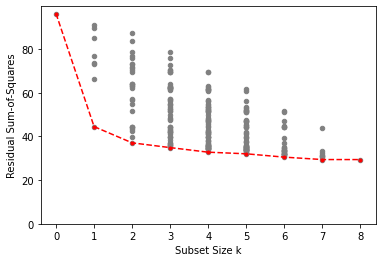

In [2]:
data = []

for k in range(X_train.shape[1] + 1):
    reg = BestSubsetLinearRegression(k=k)
    reg.fit(X_train, y_train)
    data.extend([[k, mse] for mse in reg.all_mse_])

df = pd.DataFrame(data=data, columns=['k', 'mse'])
df['rss'] = df['mse'] * X_train.shape[0]
ax = df.plot.scatter('k', 'rss', ylim=(0, None), color='gray')
df.groupby('k')['rss'].min().plot(ax=ax, style='.--', color='red')
ax.set_xlabel("Subset Size k")
ax.set_ylabel("Residual Sum-of-Squares");